## Lead Scoring Case Study

### Importing Data

In [349]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [350]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [351]:
# Importing all datasets
Leads = pd.read_csv("C:\\Users\\Tamilvanan\\Desktop\\Machine learning\\Leads.csv")

In [352]:
print(len(Leads))

9240


### Let's understand the structure of our dataframe

In [353]:
# Let's see the head of our master dataset
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [354]:
Leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Checking for Missing Values and Inputing Them

In [355]:
# Checking the percentage of missing values
round(100*(Leads.isnull().sum()/len(Leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### As lot of columns have values as Select which is to be nullified

In [356]:
(Leads.isin(['Select']).sum()/len(Leads.index))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.000000
Last Activity                                     0.000000
Country                                           0.000000
Specialization                                   21.017316
How did you hear about X Education               54.577922
What is your current occupation                   0.000000
What matters most to you in choosing a course     0.000000
Search                                            0.0000

In [357]:
# Replacing Select in below columns as Null
Leads['Specialization']=Leads['Specialization'].apply(lambda x:np.NaN if x=='Select' else x)
Leads['How did you hear about X Education']=Leads['How did you hear about X Education'].apply(lambda x:np.NaN if x=='Select' else x)
Leads['Lead Profile']=Leads['Lead Profile'].apply(lambda x:np.NaN if x=='Select' else x)
Leads['City']=Leads['City'].apply(lambda x:np.NaN if x=='Select' else x)

In [358]:
# Ensuring all select values are nullified
(Leads.isin(['Select']).sum()/len(Leads.index))*100

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                             

In [359]:
# Checking percentage of null values after nullifying select
round(100*(Leads.isnull().sum()/len(Leads.index)), 2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

#### Columns 'How did you hear about X Education', 'Lead Profile', 'Lead Quality' seem to have high percentage of null values. Hence can be removed from the dataframe.

In [360]:
Leads.drop(['How did you hear about X Education','Lead Profile','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'], axis=1,inplace=True)

In [361]:
round(100*(Leads.isnull().sum()/len(Leads.index)), 2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Search    

#### Basic EDA to understand variance of data

In [362]:
Leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [363]:
Leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [364]:
Leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
Nigeria                    4
Canada                     4
South Africa               4
Germany                    4
Sweden                     3
Bangladesh                 2
Asia/Pacific Region        2
Philippines                2
Italy                      2
Ghana                      2
China                      2
Uganda                     2
Netherlands                2
Belgium                    2
Tanzania                   1
Denmark                    1
Switzerland                1
Russia                     1
Indonesia                  1
Malaysia                   1
Liberia       

In [365]:
# Dropping columns with low variance
Leads.drop(['What matters most to you in choosing a course','Country','City','Specialization','Tags','What is your current occupation'], axis=1,inplace=True)

In [366]:
# Checking for null percentages again
round(100*(Leads.isnull().sum()/len(Leads.index)), 2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Last Activity                               1.11
Lead Source                                 0.39
Last Notable Activity                       0.00
A free copy of Mastering The Interview      0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
Total Time Spent on Website                 0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply 

In [367]:
# Taking backup before dataframe is further modified
Leads_bkp = Leads

# Removing rows where TotalVisits,Page Views Per Visit,Last Activity,Lead Source has null values
Leads = Leads.loc[Leads.loc[:,['TotalVisits','Page Views Per Visit','Last Activity','Lead Source']].isnull().sum(axis=1)==0] 

In [368]:
round(100*(Leads.isnull().sum()/len(Leads.index)), 2).sort_values(ascending=False)

Last Notable Activity                       0.0
A free copy of Mastering The Interview      0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

In [369]:
# Checking percentage of retained rows after null value cleaning of rows
round(100*(len(Leads.index)/len(Leads_bkp.index)), 2)

98.2

In [370]:
len(Leads.index)

9074

Now we don't have any missing values

In [371]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 24 columns):
Prospect ID                                 9074 non-null object
Lead Number                                 9074 non-null int64
Lead Origin                                 9074 non-null object
Lead Source                                 9074 non-null object
Do Not Email                                9074 non-null object
Do Not Call                                 9074 non-null object
Converted                                   9074 non-null int64
TotalVisits                                 9074 non-null float64
Total Time Spent on Website                 9074 non-null int64
Page Views Per Visit                        9074 non-null float64
Last Activity                               9074 non-null object
Search                                      9074 non-null object
Magazine                                    9074 non-null object
Newspaper Article                           9074 

In [372]:
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


### Data Preparation

In [373]:
# Converting Yes to 1 and No to 0 for all the binary categorical variables below
Leads['Do Not Email'] = Leads['Do Not Email'].map({'Yes': 1, 'No': 0})
Leads['Do Not Call'] = Leads['Do Not Call'].map({'Yes': 1, 'No': 0})
Leads['Search'] = Leads['Search'].map({'Yes': 1, 'No': 0})
Leads['Magazine'] = Leads['Magazine'].map({'Yes': 1, 'No': 0})
Leads['Newspaper Article'] = Leads['Newspaper Article'].map({'Yes':1,'No':0})
Leads['X Education Forums'] = Leads['X Education Forums'].map({'Yes':1,'No':0})
Leads['Digital Advertisement'] = Leads['Digital Advertisement'].map({'Yes':1,'No':0})
Leads['Receive More Updates About Our Courses'] = Leads['Receive More Updates About Our Courses'].map({'Yes':1,'No':0})
Leads['Update me on Supply Chain Content'] = Leads['Update me on Supply Chain Content'].map({'Yes':1,'No':0})
Leads['I agree to pay the amount through cheque'] = Leads['I agree to pay the amount through cheque'].map({'Yes':1,'No':0})
Leads['A free copy of Mastering The Interview'] = Leads['A free copy of Mastering The Interview'].map({'Yes':1,'No':0})
Leads['Newspaper'] = Leads['Newspaper'].map({'Yes':1,'No':0})
Leads['Through Recommendations'] = Leads['Through Recommendations'].map({'Yes':1,'No':0})
Leads['Get updates on DM Content'] = Leads['Get updates on DM Content'].map({'Yes':1,'No':0})

In [374]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 24 columns):
Prospect ID                                 9074 non-null object
Lead Number                                 9074 non-null int64
Lead Origin                                 9074 non-null object
Lead Source                                 9074 non-null object
Do Not Email                                9074 non-null int64
Do Not Call                                 9074 non-null int64
Converted                                   9074 non-null int64
TotalVisits                                 9074 non-null float64
Total Time Spent on Website                 9074 non-null int64
Page Views Per Visit                        9074 non-null float64
Last Activity                               9074 non-null object
Search                                      9074 non-null int64
Magazine                                    9074 non-null int64
Newspaper Article                           9074 non-

### Dummy Variable Creation

In [375]:
# Creating a dummy variable for the variable 'Lead Origin' and dropping the first one.
orig = pd.get_dummies(Leads['Lead Origin'],prefix='Origin',drop_first=True)
#Adding the results to the master dataframe
Leads = pd.concat([Leads,orig],axis=1)

# Creating a dummy variable for the variable 'Lead Source' and dropping the first one.
sour = pd.get_dummies(Leads['Lead Source'],prefix='Source',drop_first=True)
#Adding the results to the master dataframe
Leads = pd.concat([Leads,sour],axis=1)

# Creating a dummy variable for the variable 'Last Activity' and dropping the first one.
act = pd.get_dummies(Leads['Last Activity'],prefix='Activity',drop_first=True)
#Adding the results to the master dataframe
Leads = pd.concat([Leads,act],axis=1)

# Creating a dummy variable for the variable 'Last Notable Activity' and dropping the first one.
Not = pd.get_dummies(Leads['Last Notable Activity'],prefix='Notable',drop_first=True)

#Adding the results to the master dataframe
Leads = pd.concat([Leads,Not],axis=1)


### Dropping the repeated variables

In [376]:
# We have created dummies for the below variables, so we can drop them
Leads = Leads.drop(['Prospect ID','Lead Origin','Lead Source','Last Activity','Last Notable Activity'], 1)

In [377]:
Leads.set_index('Lead Number',inplace=True)

In [378]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 660737 to 579533
Data columns (total 72 columns):
Do Not Email                                9074 non-null int64
Do Not Call                                 9074 non-null int64
Converted                                   9074 non-null int64
TotalVisits                                 9074 non-null float64
Total Time Spent on Website                 9074 non-null int64
Page Views Per Visit                        9074 non-null float64
Search                                      9074 non-null int64
Magazine                                    9074 non-null int64
Newspaper Article                           9074 non-null int64
X Education Forums                          9074 non-null int64
Newspaper                                   9074 non-null int64
Digital Advertisement                       9074 non-null int64
Through Recommendations                     9074 non-null int64
Receive More Updates About Our Courses      9074 n

Now we can see we have all variables as integer.

### Checking for Outliers

In [379]:
# Checking for outliers in the continuous variables
num_Leads = Leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [380]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_Leads.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


In [382]:
# Getting quantiles
q1=num_Leads.quantile(0.25)
q3=num_Leads.quantile(0.75)
iqr=q3-q1

# Removing Outliers as those present beyond 1.5*interquartile distance
Leads=Leads[~((num_Leads < (q1 - 1.5 * iqr)) | (num_Leads > (q3 + 1.5 * iqr))).any(axis=1)]

In [386]:
# Ensuring most outliers are removed now
num_Leads = Leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
num_Leads.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8513.000000,8513.000000,8513.000000
mean,2.820040,471.378010,2.083452
std,2.434342,543.082669,1.652560
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,3.000000,234.000000,2.000000
75%,4.000000,894.000000,3.000000
90%,6.000000,1366.800000,4.000000
95%,7.000000,1552.000000,5.000000
99%,10.000000,1838.760000,6.000000


From the distribution shown above, you can see that there no outliner in your data after IQR treatment. The numbers are gradually increasing.

## Model Building
Let's start by splitting our data into a training set and a test set.

### Splitting Data into Training and Test Sets

In [387]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = Leads.drop(['Converted'],axis=1)

# Putting response variable to y
y = Leads['Converted']

y.head()

Lead Number
660737    0
660728    0
660727    1
660719    0
660681    1
Name: Converted, dtype: int64

In [388]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Notable_Form Submitted on Website,Notable_Had a Phone Conversation,Notable_Modified,Notable_Olark Chat Conversation,Notable_Page Visited on Website,Notable_Resubscribed to emails,Notable_SMS Sent,Notable_Unreachable,Notable_Unsubscribed,Notable_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
660728,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660727,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660719,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
660681,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [389]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### Scaling the continuous features

In [390]:
from sklearn.preprocessing import StandardScaler

In [391]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Notable_Form Submitted on Website,Notable_Had a Phone Conversation,Notable_Modified,Notable_Olark Chat Conversation,Notable_Page Visited on Website,Notable_Resubscribed to emails,Notable_SMS Sent,Notable_Unreachable,Notable_Unsubscribed,Notable_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
610682,0,0,-1.153092,-0.867873,-1.253080,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
601382,0,0,-0.743258,0.108309,-0.648118,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
625453,0,0,1.305912,-0.842280,0.561805,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
630936,0,0,0.896078,-0.451076,0.259325,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
587667,0,0,-0.743258,-0.767330,-0.648118,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Checking the Conversion Rate

In [392]:
conversion = (sum(Leads['Converted'])/len(Leads['Converted'].index))*100
conversion

37.66004933630918

We have almost 38% conversion rate

In [393]:
Leads.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,Notable_Form Submitted on Website,Notable_Had a Phone Conversation,Notable_Modified,Notable_Olark Chat Conversation,Notable_Page Visited on Website,Notable_Resubscribed to emails,Notable_SMS Sent,Notable_Unreachable,Notable_Unsubscribed,Notable_View in browser link Clicked
count,8513.000000,8513.000000,8513.000000,8513.000000,8513.000000,8513.000000,8513.000000,8513.0,8513.0,8513.0,...,8513.000000,8513.000000,8513.000000,8513.000000,8513.000000,8513.000000,8513.000000,8513.000000,8513.000000,8513.000000
mean,0.076706,0.000235,0.376600,2.820040,471.378010,2.083452,0.000940,0.0,0.0,0.0,...,0.000117,0.001292,0.366381,0.020557,0.029014,0.000117,0.238341,0.003524,0.005051,0.000117
std,0.266140,0.015327,0.484562,2.434342,543.082669,1.652560,0.030643,0.0,0.0,0.0,...,0.010838,0.035925,0.481844,0.141903,0.167857,0.010838,0.426094,0.059262,0.070896,0.010838
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,234.000000,2.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,4.000000,894.000000,3.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,11.000000,2272.000000,6.000000,1.000000,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Running Your First Training Model

In [394]:
import statsmodels.api as sm

In [395]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5904
Model Family:                Binomial   Df Model:                           54
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 03 Mar 2019   Deviance:                          nan
Time:                        17:01:17   Pearson chi2:                 7.21e+18
No. Iterations:                   100   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                     2.275e+15    9.1e+07    2.5e+07      0.000    2.27e+15    2.27e+15
Do Not Email                             -1.214e+14   4.81e+06  -2.52e+07      0.000   -1.21e+14   -1.21e+14
Do Not Call                                 30.6303   5.02e-07   6.11e+07      0.000      30.630      30.630
TotalVisits                              -3.335e+14   1.44e+06  -2.32e+08      0.000   -3.34e+14   -3.34e+14
Total Time Spent on Website               8.293e+14   1.01e+06   8.19e+08      0.000    8.29e+14    8.29e+14
Page Views Per Visit                       1.45e+14    1.6e+06   9.04e+07      0.000    1.45e+14    1.45e+14
Search                                   -2.498e+15   4.25e+07  -5.87e+07      0.000    -2.5e+15    -2.5e+15
Magazine                                    39.7786   5.77e-07   6.89e+07      0.000      39.779      39.779
Newspaper Article                          -28.3665   7.04e-07  -4.03e+07      0.000     -28.367     -28.366
X Education Forums                         -63.0056   6.66e-07  -9.46e+07      0.000     -63.006     -63.006
Newspaper                                  -11.8211   4.31e-07  -2.74e+07      0.000     -11.821     -11.821
Digital Advertisement                    -1.406e+15   4.76e+07  -2.96e+07      0.000   -1.41e+15   -1.41e+15
Through Recommendations                  -4.117e+13   5.21e+07   -7.9e+05      0.000   -4.12e+13   -4.12e+13
Receive More Updates About Our Courses      -8.6801   2.72e-07  -3.19e+07      0.000      -8.680      -8.680
Update me on Supply Chain Content           66.9511    6.9e-07    9.7e+07      0.000      66.951      66.951
Get updates on DM Content                   21.2810   3.91e-07   5.45e+07      0.000      21.281      21.281
I agree to pay the amount through cheque    34.3775   5.82e-07   5.91e+07      0.000      34.377      34.377
A free copy of Mastering The Interview   -6.466e+13   2.79e+06  -2.32e+07      0.000   -6.47e+13   -6.47e+13
Origin_Landing Page Submission            6.414e+13   2.85e+06   2.25e+07      0.000    6.41e+13    6.41e+13
Origin_Lead Add Form                      1.106e+15   4.75e+07   2.33e+07      0.000    1.11e+15    1.11e+15
Origin_Lead Import                        6.272e+15   6.89e+07    9.1e+07      0.000    6.27e+15    6.27e+15
Source_Direct Traffic                     1.606e+15   6.14e+07   2.62e+07      0.000    1.61e+15    1.61e+15
Source_Facebook                          -3.828e+15   9.09e+07  -4.21e+07      0.000   -3.83e+15   -3.83e+15
Source_Google                             1.758e+15   6.13e+07   2.87e+07      0.000    1.76e+15    1.76e+15
Source_Live Chat                          4.853e+15   7.75e+07   6.26e+07      0.000    4.85e+15    4.85e+15
Source_NC_EDM                             4.723e+15    9.1e+07   5.19e+07      0.000    4.72e+15    4.72e+15
S

### Correlation Matrix

In [396]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

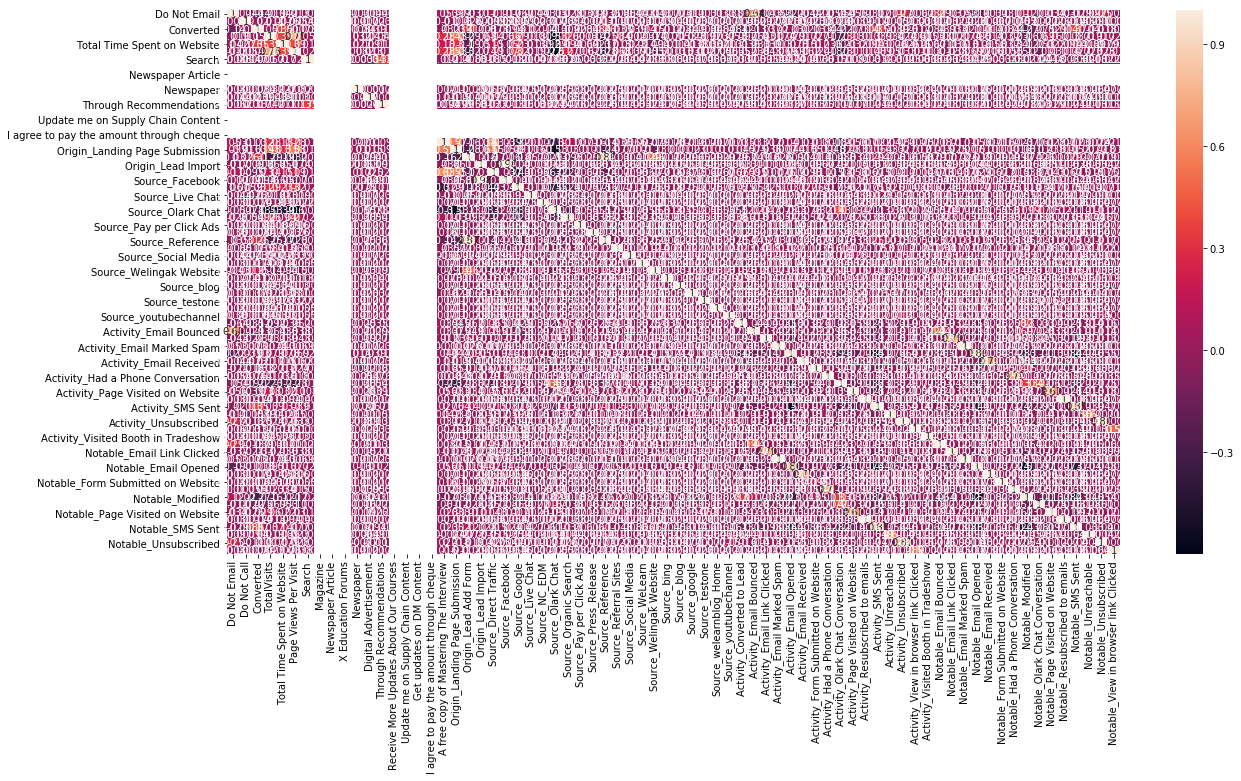

In [397]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(Leads.corr(),annot = True)

### Feature Selection Using RFE

In [398]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[ True False False  True False False False False False False False False
 False False False False False False  True  True False False False False
 False  True False False False  True False  True False  True False False
 False False False False  True  True  True False False False False  True
  True  True False False False False False False False  True False  True
 False False False  True False False False  True  True  True False]
[ 1 48 22  1 23 28 43 38 37 50 36 11 40 42 41 47 32 35  1  1  7 33  9 34
 24  1  8 27 51  1  6  1 20  1 30 13  5 25 18 49  1  1  1 14 26 16  4  1
  1  1 45 19  2 31 15 46 10  1 12  1 44 29  3  1 17 21 39  1  1  1 52]


In [399]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 48),
 ('TotalVisits', False, 22),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Search', False, 28),
 ('Magazine', False, 43),
 ('Newspaper Article', False, 38),
 ('X Education Forums', False, 37),
 ('Newspaper', False, 50),
 ('Digital Advertisement', False, 36),
 ('Through Recommendations', False, 11),
 ('Receive More Updates About Our Courses', False, 40),
 ('Update me on Supply Chain Content', False, 42),
 ('Get updates on DM Content', False, 41),
 ('I agree to pay the amount through cheque', False, 47),
 ('A free copy of Mastering The Interview', False, 32),
 ('Origin_Landing Page Submission', False, 35),
 ('Origin_Lead Add Form', True, 1),
 ('Origin_Lead Import', True, 1),
 ('Source_Direct Traffic', False, 7),
 ('Source_Facebook', False, 33),
 ('Source_Google', False, 9),
 ('Source_Live Chat', False, 34),
 ('Source_NC_EDM', False, 24),
 ('Source_Olark Chat', True, 1),
 ('Source_Organic Search

In [400]:
# Variables selected by RFE 
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Origin_Lead Add Form',
       'Origin_Lead Import', 'Source_Olark Chat', 'Source_Reference',
       'Source_Social Media', 'Source_Welingak Website',
       'Activity_Converted to Lead', 'Activity_Email Bounced',
       'Activity_Email Link Clicked', 'Activity_Had a Phone Conversation',
       'Activity_Olark Chat Conversation', 'Activity_Page Visited on Website',
       'Notable_Email Link Clicked', 'Notable_Email Opened',
       'Notable_Modified', 'Notable_SMS Sent', 'Notable_Unreachable',
       'Notable_Unsubscribed'],
      dtype='object')

In [401]:
X_train[col].isnull().sum()

Do Not Email                         0
Total Time Spent on Website          0
Origin_Lead Add Form                 0
Origin_Lead Import                   0
Source_Olark Chat                    0
Source_Reference                     0
Source_Social Media                  0
Source_Welingak Website              0
Activity_Converted to Lead           0
Activity_Email Bounced               0
Activity_Email Link Clicked          0
Activity_Had a Phone Conversation    0
Activity_Olark Chat Conversation     0
Activity_Page Visited on Website     0
Notable_Email Link Clicked           0
Notable_Email Opened                 0
Notable_Modified                     0
Notable_SMS Sent                     0
Notable_Unreachable                  0
Notable_Unsubscribed                 0
dtype: int64

### Re-building the model based on RFE variables

In [402]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5938
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2603.2
Date:                Sun, 03 Mar 2019   Deviance:                       5206.5
Time:                        17:02:07   Pearson chi2:                 6.11e+03
No. Iterations:                    19   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.5008      0.226     -2.218      0.027      -0.943      -0.058
Do Not Email                         -1.5192      0.221     -6.883      0.000      -1.952      -1.087
Total Time Spent on Website           1.1172      0.041     27.378      0.000       1.037       1.197
Origin_Lead Add Form                  2.1677      0.919      2.359      0.018       0.367       3.969
Origin_Lead Import                    1.2593      0.494      2.550      0.011       0.292       2.227
Source_Olark Chat                     1.1686      0.103     11.330      0.000       0.966       1.371
Source_Reference                      2.0696      0.943      2.194      0.028       0.221       3.918
Source_Social Media                  22.6945   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Source_Welingak Website               4.1758      1.367      3.055      0.002       1.497       6.855
Activity_Converted to Lead           -1.2041      0.215     -5.603      0.000      -1.625      -0.783
Activity_Email Bounced               -0.9476      0.402     -2.355      0.018      -1.736      -0.159
Activity_Email Link Clicked          -0.6255      0.334     -1.875      0.061      -1.279       0.028
Activity_Had a Phone Conversation     2.9626      1.310      2.261      0.024       0.395       5.531
Activity_Olark Chat Conversation     -1.8873      0.192     -9.821      0.000      -2.264      -1.511
Activity_Page Visited on Website     -0.7852      0.204     -3.840      0.000      -1.186      -0.384
Notable_Email Link Clicked           -0.6169      0.464     -1.330      0.184      -1.526       0.292
Notable_Email Opened                 -0.6169      0.230     -2.677      0.007      -1.069      -0.165
Notable_Modified                     -0.6946      0.208     -3.335      0.001      -1.103      -0.286
Notable_SMS Sent                      0.8398      0.234      3.595      0.000       0.382       1.298
Notable_Unreachable                   1.1606      0.601      1.932      0.053      -0.017       2.338
Notable_Unsubscribed                  0.9012      0.532      1.694      0.090      -0.142       1.944
=====================================================================================================
"""

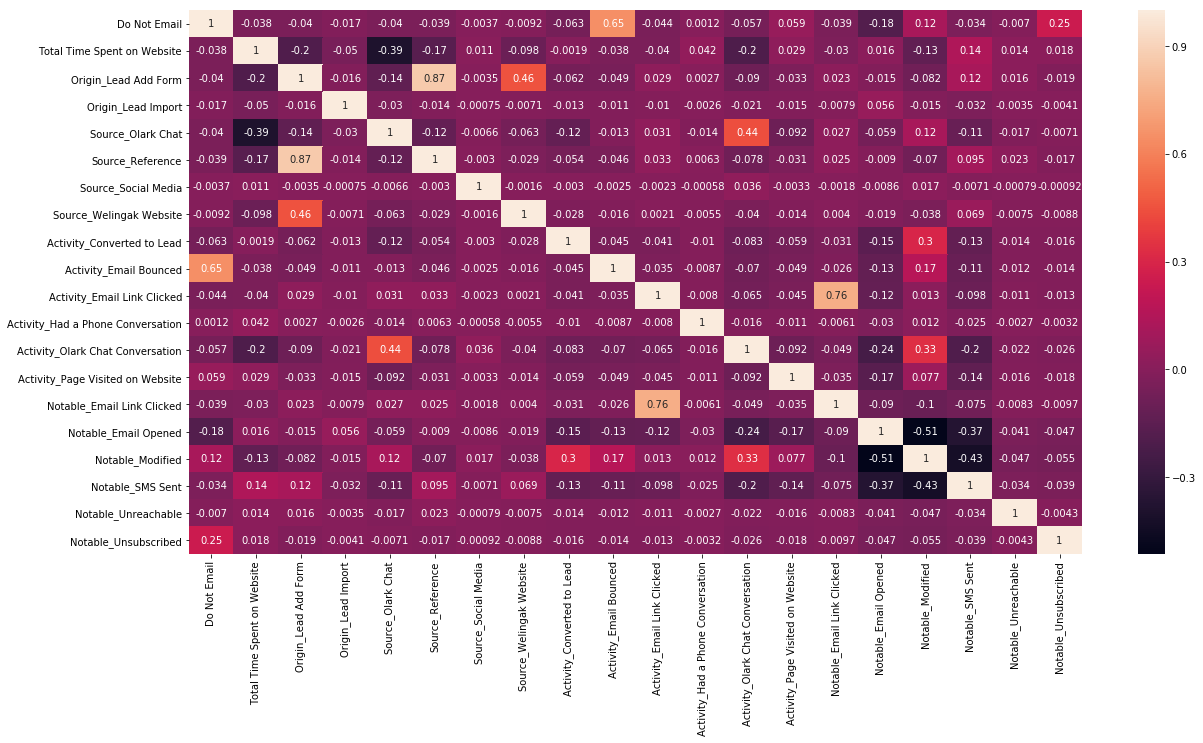

In [403]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train[col].corr(),annot = True)

### Making Predictions

In [404]:
# Predicted probabilities
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

Lead Number
610682    0.269632
601382    0.092912
625453    0.051091
630936    0.154543
587667    0.037080
645790    0.328337
658264    0.861007
653696    0.725948
639314    0.269632
655337    0.895668
dtype: float64

In [405]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.26963222, 0.09291192, 0.05109146, 0.1545428 , 0.03708037,
       0.32833669, 0.86100707, 0.72594809, 0.26963222, 0.89566805])

##### Creating a dataframe with the actual converted flag and the predicted conversion probabilities

In [406]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number
0,0,0.269632,610682
1,0,0.092912,601382
2,0,0.051091,625453
3,0,0.154543,630936
4,0,0.037080,587667


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [407]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted
0,0,0.269632,610682,0
1,0,0.092912,601382,0
2,0,0.051091,625453,0
3,0,0.154543,630936,0
4,0,0.037080,587667,0


### Model Evaluation

In [408]:
from sklearn import metrics

In [409]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3246,  460],
       [ 743, 1510]], dtype=int64)

In [184]:
# Predicted     Churn  not_churn  __all__
# Actual
# Churn            1359   169     1528
# not_churn         256   326      582
# __all__          1615   751     2110

In [410]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7981204900151032

#### Checking VIFs

In [411]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [412]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Origin_Lead Add Form,67.81
5,Source_Reference,52.90
7,Source_Welingak Website,15.86
10,Activity_Email Link Clicked,2.61
14,Notable_Email Link Clicked,2.54
0,Do Not Email,2.18
16,Notable_Modified,2.05
9,Activity_Email Bounced,2.03
4,Source_Olark Chat,1.89
12,Activity_Olark Chat Conversation,1.73


In [413]:
col = col.drop('Origin_Lead Add Form', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Origin_Lead Import',
       'Source_Olark Chat', 'Source_Reference', 'Source_Social Media',
       'Source_Welingak Website', 'Activity_Converted to Lead',
       'Activity_Email Bounced', 'Activity_Email Link Clicked',
       'Activity_Had a Phone Conversation', 'Activity_Olark Chat Conversation',
       'Activity_Page Visited on Website', 'Notable_Email Link Clicked',
       'Notable_Email Opened', 'Notable_Modified', 'Notable_SMS Sent',
       'Notable_Unreachable', 'Notable_Unsubscribed'],
      dtype='object')

In [414]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5939
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2606.2
Date:                Sun, 03 Mar 2019   Deviance:                       5212.3
Time:                        17:09:14   Pearson chi2:                 6.11e+03
No. Iterations:                    19   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.4872      0.225     -2.162      0.031      -0.929      -0.046
Do Not Email                         -1.5218      0.221     -6.899      0.000      -1.954      -1.089
Total Time Spent on Website           1.1137      0.041     27.334      0.000       1.034       1.194
Origin_Lead Import                    1.2506      0.494      2.533      0.011       0.283       2.218
Source_Olark Chat                     1.1643      0.103     11.300      0.000       0.962       1.366
Source_Reference                      4.2295      0.229     18.477      0.000       3.781       4.678
Source_Social Media                  22.6980   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Source_Welingak Website               6.3355      1.016      6.238      0.000       4.345       8.326
Activity_Converted to Lead           -1.2065      0.215     -5.617      0.000      -1.627      -0.786
Activity_Email Bounced               -0.9503      0.402     -2.363      0.018      -1.739      -0.162
Activity_Email Link Clicked          -0.6277      0.333     -1.883      0.060      -1.281       0.026
Activity_Had a Phone Conversation     2.9569      1.311      2.256      0.024       0.388       5.526
Activity_Olark Chat Conversation     -1.8925      0.192     -9.849      0.000      -2.269      -1.516
Activity_Page Visited on Website     -0.7829      0.204     -3.835      0.000      -1.183      -0.383
Notable_Email Link Clicked           -0.6262      0.463     -1.351      0.177      -1.535       0.282
Notable_Email Opened                 -0.6246      0.230     -2.715      0.007      -1.076      -0.174
Notable_Modified                     -0.7036      0.208     -3.385      0.001      -1.111      -0.296
Notable_SMS Sent                      0.8294      0.233      3.557      0.000       0.372       1.286
Notable_Unreachable                   1.1471      0.600      1.910      0.056      -0.030       2.324
Notable_Unsubscribed                  0.8921      0.532      1.678      0.093      -0.150       1.934
=====================================================================================================
"""

In [415]:
col = col.drop('Source_Social Media', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Origin_Lead Import',
       'Source_Olark Chat', 'Source_Reference', 'Source_Welingak Website',
       'Activity_Converted to Lead', 'Activity_Email Bounced',
       'Activity_Email Link Clicked', 'Activity_Had a Phone Conversation',
       'Activity_Olark Chat Conversation', 'Activity_Page Visited on Website',
       'Notable_Email Link Clicked', 'Notable_Email Opened',
       'Notable_Modified', 'Notable_SMS Sent', 'Notable_Unreachable',
       'Notable_Unsubscribed'],
      dtype='object')

### Re-building the model after removing insignificant variable with high P value

In [416]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5940
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2608.4
Date:                Sun, 03 Mar 2019   Deviance:                       5216.8
Time:                        17:11:11   Pearson chi2:                 6.11e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.4981      0.225     -2.215      0.027      -0.939      -0.057
Do Not Email                         -1.5224      0.221     -6.903      0.000      -1.955      -1.090
Total Time Spent on Website           1.1140      0.041     27.345      0.000       1.034       1.194
Origin_Lead Import                    1.2500      0.494      2.532      0.011       0.282       2.218
Source_Olark Chat                     1.1598      0.103     11.261      0.000       0.958       1.362
Source_Reference                      4.2289      0.229     18.475      0.000       3.780       4.677
Source_Welingak Website               6.3349      1.016      6.238      0.000       4.344       8.325
Activity_Converted to Lead           -1.2076      0.215     -5.622      0.000      -1.629      -0.787
Activity_Email Bounced               -0.9461      0.402     -2.353      0.019      -1.734      -0.158
Activity_Email Link Clicked          -0.6271      0.333     -1.881      0.060      -1.281       0.026
Activity_Had a Phone Conversation     2.9598      1.310      2.260      0.024       0.393       5.527
Activity_Olark Chat Conversation     -1.8653      0.191     -9.781      0.000      -2.239      -1.491
Activity_Page Visited on Website     -0.7769      0.204     -3.811      0.000      -1.176      -0.377
Notable_Email Link Clicked           -0.6143      0.463     -1.326      0.185      -1.522       0.294
Notable_Email Opened                 -0.6128      0.230     -2.669      0.008      -1.063      -0.163
Notable_Modified                     -0.6918      0.207     -3.336      0.001      -1.098      -0.285
Notable_SMS Sent                      0.8412      0.233      3.614      0.000       0.385       1.297
Notable_Unreachable                   1.1585      0.600      1.930      0.054      -0.018       2.335
Notable_Unsubscribed                  0.9045      0.531      1.702      0.089      -0.137       1.946
=====================================================================================================
"""

In [417]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Activity_Email Link Clicked,2.61
12,Notable_Email Link Clicked,2.54
0,Do Not Email,2.18
14,Notable_Modified,2.04
7,Activity_Email Bounced,2.03
3,Source_Olark Chat,1.89
10,Activity_Olark Chat Conversation,1.73
1,Total Time Spent on Website,1.32
6,Activity_Converted to Lead,1.28
15,Notable_SMS Sent,1.21


In [418]:
col = col.drop('Notable_Email Link Clicked', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Origin_Lead Import',
       'Source_Olark Chat', 'Source_Reference', 'Source_Welingak Website',
       'Activity_Converted to Lead', 'Activity_Email Bounced',
       'Activity_Email Link Clicked', 'Activity_Had a Phone Conversation',
       'Activity_Olark Chat Conversation', 'Activity_Page Visited on Website',
       'Notable_Email Opened', 'Notable_Modified', 'Notable_SMS Sent',
       'Notable_Unreachable', 'Notable_Unsubscribed'],
      dtype='object')

### Re-building the model after removing highly correlated variables with high VIF

In [419]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5941
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2609.3
Date:                Sun, 03 Mar 2019   Deviance:                       5218.5
Time:                        17:13:27   Pearson chi2:                 6.10e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.6201      0.206     -3.014      0.003      -1.023      -0.217
Do Not Email                         -1.5200      0.220     -6.899      0.000      -1.952      -1.088
Total Time Spent on Website           1.1152      0.041     27.384      0.000       1.035       1.195
Origin_Lead Import                    1.2517      0.494      2.535      0.011       0.284       2.219
Source_Olark Chat                     1.1609      0.103     11.272      0.000       0.959       1.363
Source_Reference                      4.2388      0.229     18.497      0.000       3.790       4.688
Source_Welingak Website               6.3489      1.016      6.248      0.000       4.357       8.341
Activity_Converted to Lead           -1.2080      0.215     -5.623      0.000      -1.629      -0.787
Activity_Email Bounced               -0.9105      0.400     -2.277      0.023      -1.694      -0.127
Activity_Email Link Clicked          -0.9365      0.250     -3.752      0.000      -1.426      -0.447
Activity_Had a Phone Conversation     2.9962      1.299      2.307      0.021       0.451       5.542
Activity_Olark Chat Conversation     -1.8292      0.187     -9.761      0.000      -2.196      -1.462
Activity_Page Visited on Website     -0.7105      0.196     -3.620      0.000      -1.095      -0.326
Notable_Email Opened                 -0.4915      0.211     -2.328      0.020      -0.905      -0.078
Notable_Modified                     -0.5701      0.187     -3.056      0.002      -0.936      -0.205
Notable_SMS Sent                      0.9626      0.214      4.488      0.000       0.542       1.383
Notable_Unreachable                   1.2803      0.594      2.157      0.031       0.117       2.444
Notable_Unsubscribed                  1.0234      0.524      1.953      0.051      -0.004       2.051
=====================================================================================================
"""

In [420]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Do Not Email,2.18
7,Activity_Email Bounced,2.03
13,Notable_Modified,1.96
3,Source_Olark Chat,1.88
10,Activity_Olark Chat Conversation,1.72
1,Total Time Spent on Website,1.32
6,Activity_Converted to Lead,1.26
14,Notable_SMS Sent,1.20
4,Source_Reference,1.16
16,Notable_Unsubscribed,1.15


### Making Predictions

In [422]:
# Predicted probabilities
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

Lead Number
610682    0.269483
601382    0.093004
625453    0.055192
630936    0.155337
587667    0.037182
645790    0.318347
658264    0.860980
653696    0.726417
639314    0.269483
655337    0.896531
dtype: float64

In [423]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.26948301, 0.09300422, 0.05519167, 0.15533664, 0.03718195,
       0.31834738, 0.86097995, 0.72641746, 0.26948301, 0.89653078])

##### Creating a dataframe with the actual converted flag and the predicted conversion probabilities

In [424]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number
0,0,0.269483,610682
1,0,0.093004,601382
2,0,0.055192,625453
3,0,0.155337,630936
4,0,0.037182,587667


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [425]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted
0,0,0.269483,610682,0
1,0,0.093004,601382,0
2,0,0.055192,625453,0
3,0,0.155337,630936,0
4,0,0.037182,587667,0


### Model Evaluation

In [426]:
from sklearn import metrics

In [427]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3242,  464],
       [ 747, 1506]], dtype=int64)

In [184]:
# Predicted     Churn  not_churn  __all__
# Actual
# Churn            1359   169     1528
# not_churn         256   326      582
# __all__          1615   751     2110

In [428]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.796777982883034

### The Accuracy hasn't dropped on removing insignificant features.

In [433]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [434]:
# Precision 
print (TP / float(TP+FP))

0.7644670050761422


### Precision score of 76% indicates that out of 100 hot leads identified by the model, 76 of them would be converted in reality, which is close to desired 80% conversion target.

In [435]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

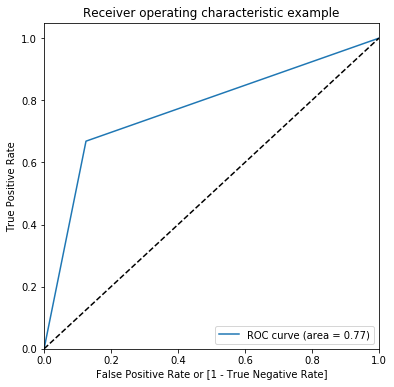

(array([0.        , 0.12520237, 1.        ]),
 array([0.        , 0.66844208, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [436]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.predicted)

In [437]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob))

'0.87'

#### We see an overall AUC score of 0.87 looks like we did a decent job.


## Making predictions on test set

In [438]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [439]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Origin_Lead Import,Source_Olark Chat,Source_Reference,Source_Welingak Website,Activity_Converted to Lead,Activity_Email Bounced,Activity_Email Link Clicked,Activity_Had a Phone Conversation,Activity_Olark Chat Conversation,Activity_Page Visited on Website,Notable_Email Opened,Notable_Modified,Notable_SMS Sent,Notable_Unreachable,Notable_Unsubscribed
Lead Number,,,,,,,,,,,,,,,,,
592991,0,-0.191492,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
585749,0,2.528656,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
627121,0,-0.584524,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
583602,0,0.671351,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
588107,0,1.477524,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [440]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

In [441]:
y_test_pred[:10]

Lead Number
592991    0.068380
585749    0.836139
627121    0.146350
583602    0.410253
588107    0.879773
600947    0.159823
608449    0.115402
594636    0.269483
595825    0.646173
589220    0.285244
dtype: float64

In [448]:
y_pred_1 = pd.DataFrame(y_test_pred,columns=['Predicted prob'])
y_test_df = pd.DataFrame(y_test)

In [449]:
y_test_df

,Converted
Lead Number,
592991,0
585749,0
627121,0
583602,1
588107,1
600947,0
608449,0
594636,0
595825,1


In [450]:
y_test_pred_final= pd.concat([y_test_df,y_pred_1],axis=1)

In [451]:
y_test_pred_final.head()

,Converted,Predicted prob
Lead Number,,
592991,0,0.068380
585749,0,0.836139
627121,0,0.146350
583602,1,0.410253
588107,1,0.879773


In [453]:
y_test_pred_final['final_predicted'] = y_test_pred_final['Predicted prob'].map(lambda x: 1 if x > 0.5 else 0)

In [454]:
y_test_pred_final.head()

,Converted,Predicted prob,final_predicted
Lead Number,,,
592991,0,0.068380,0
585749,0,0.836139,1
627121,0,0.146350,0
583602,1,0.410253,0
588107,1,0.879773,1


In [455]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)

0.7971808927173062

In [457]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted )
confusion2

array([[1398,  203],
       [ 315,  638]], dtype=int64)

In [458]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

In [459]:
# Precision 
print (TP2 / float(TP2+FP2))

0.7586206896551724


### The Accuracy and Precison on test set are very similar to those obtained on training set. Hence the model is very reliable for predictions. 

### Assigning Lead Score to each potential Lead

In [474]:
# Merging test results with actual Leads DF
x=pd.merge(Leads,y_test_pred_final,how='left',left_on=Leads.index,right_on=y_test_pred_final.index)

In [475]:
# Merging above with train results DF
y=pd.merge(x,y_train_pred_final,how='left',left_on='key_0',right_on='Lead Number')

In [487]:
# Keeping only lead number and conversion probabilities from test and train sets
z=y[['key_0','Conversion_Prob','Predicted prob']]
z

,key_0,Conversion_Prob,Predicted prob
0,660737,0.153451,NaN
1,660728,0.330611,NaN
2,660727,0.739582,NaN
3,660719,0.177065,NaN
4,660681,0.388202,NaN
5,660680,0.055913,NaN
6,660673,0.765905,NaN
7,660664,0.055913,NaN
8,660624,0.126223,NaN
9,660616,0.123329,NaN


In [494]:
# Replacing Nan with 0 as Nan would mean that column is inapplicable for that particular lead
z['Conversion_Prob'].fillna(0,inplace=True)
z['Predicted prob'].fillna(0,inplace=True)

In [502]:
z['Lead Score']=round((z['Conversion_Prob']+z['Predicted prob'])*100,0)

In [503]:
Final = pd.DataFrame()

In [504]:
Final['Lead Number']=z['key_0']
Final['Lead Score']=z['Lead Score']
Final

,Lead Number,Lead Score
0,660737,15.0
1,660728,33.0
2,660727,74.0
3,660719,18.0
4,660681,39.0
5,660680,6.0
6,660673,77.0
7,660664,6.0
8,660624,13.0
9,660616,12.0


### The lead score is assigned to every lead whose value when high means it is a potential lead.